# This is a tutorial to run a simulation of a simple Boolean Network model


In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# import booleanNetwork module from ./src
import sys
sys.path.append('./src/')
import booleanNetwork as bn

### Create a Simple Boolean network models

In [2]:
# Simple Boolean network model
# v1 = v1 | v2
# v2 = v1 | v2
# v3 = ( v1 | v2 ) & !v3

ngenes = 3

# conectivity matrix
varF = np.array( [[0, 1, -1],  # indices of genes connected to gene 0
                  [0, 1, -1],  # indices of genes connected to gene 1
                  [0, 1, 2]] ) # indices of genes connected to gene 2

# truth tables
F = np.array( [[0, 1, 1, 1, -1, -1, -1, -1], # truth table for gene 0 
               [0, 1, 1, 1, -1, -1, -1, -1], # truth table for gene 1
               [0, 0, 1, 0, 1, 0, 1, 0]] ) # truth table for gene 2
        

# initia state
x0  =  np.array( [0, 0, 1] )  # initial state [v0, v1, v2] 


### Run a small simulation of 3 steps without noise

In [3]:
network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object

In [4]:
network.update( 3 )  # run 3 steps of the Boolean network model

In [5]:
y = network.getTrajectory()  # get the trajectory of the simulation
y

array([[0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

###  Run a simulation of 5000 steps with noise and plot state distribution from the trajectory

In [6]:
x0 = np.array( [0, 0, 0] ) # initial state
network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object

In [7]:
noise_level = 0.01 # noise
network.update_noise ( noise_level  , 5000) # simulation with noise

In [8]:
y = network.getTrajectory() # obtaining the trajectory

In [9]:
# transform boolean to decimal
p = np.array(  [2**i for i in range(ngenes-1, -1, -1) ] )  
states = y @ p.T 

<BarContainer object of 8 artists>

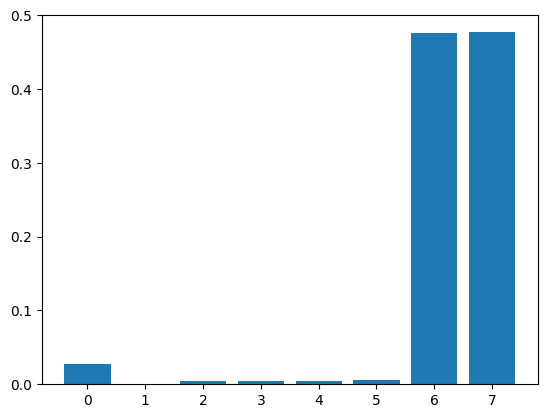

In [10]:
# plot state distribution
counts, bins = np.histogram( states, bins = range(2**ngenes + 1 )  )
freq = counts / np.sum( counts)
plt.bar(range(2**ngenes), freq )